In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("heart.csv")
df ['Sex'].replace(['M', 'F'],[0,1],inplace=True)
df ['ChestPainType'].replace(['TA', 'ATA', 'NAP', 'ASY' ],[0,1,2,3], inplace=True)
df['RestingECG'].replace(['Normal', 'ST', 'LVH'], [0,1,2], inplace=True)
df ['ExerciseAngina'].replace(['N', 'Y'],[0,1],inplace=True)
df['ST_Slope'].replace(['Up', 'Flat', 'Down'], [0,1,2], inplace=True)

print(df.columns)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


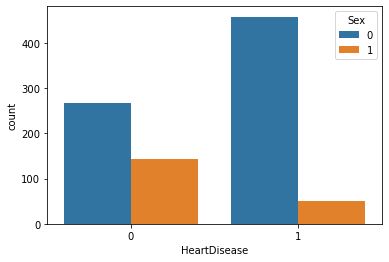

In [5]:
#CountPlot
sns.countplot(data=df,x='HeartDisease',hue='Sex')
plt.show()

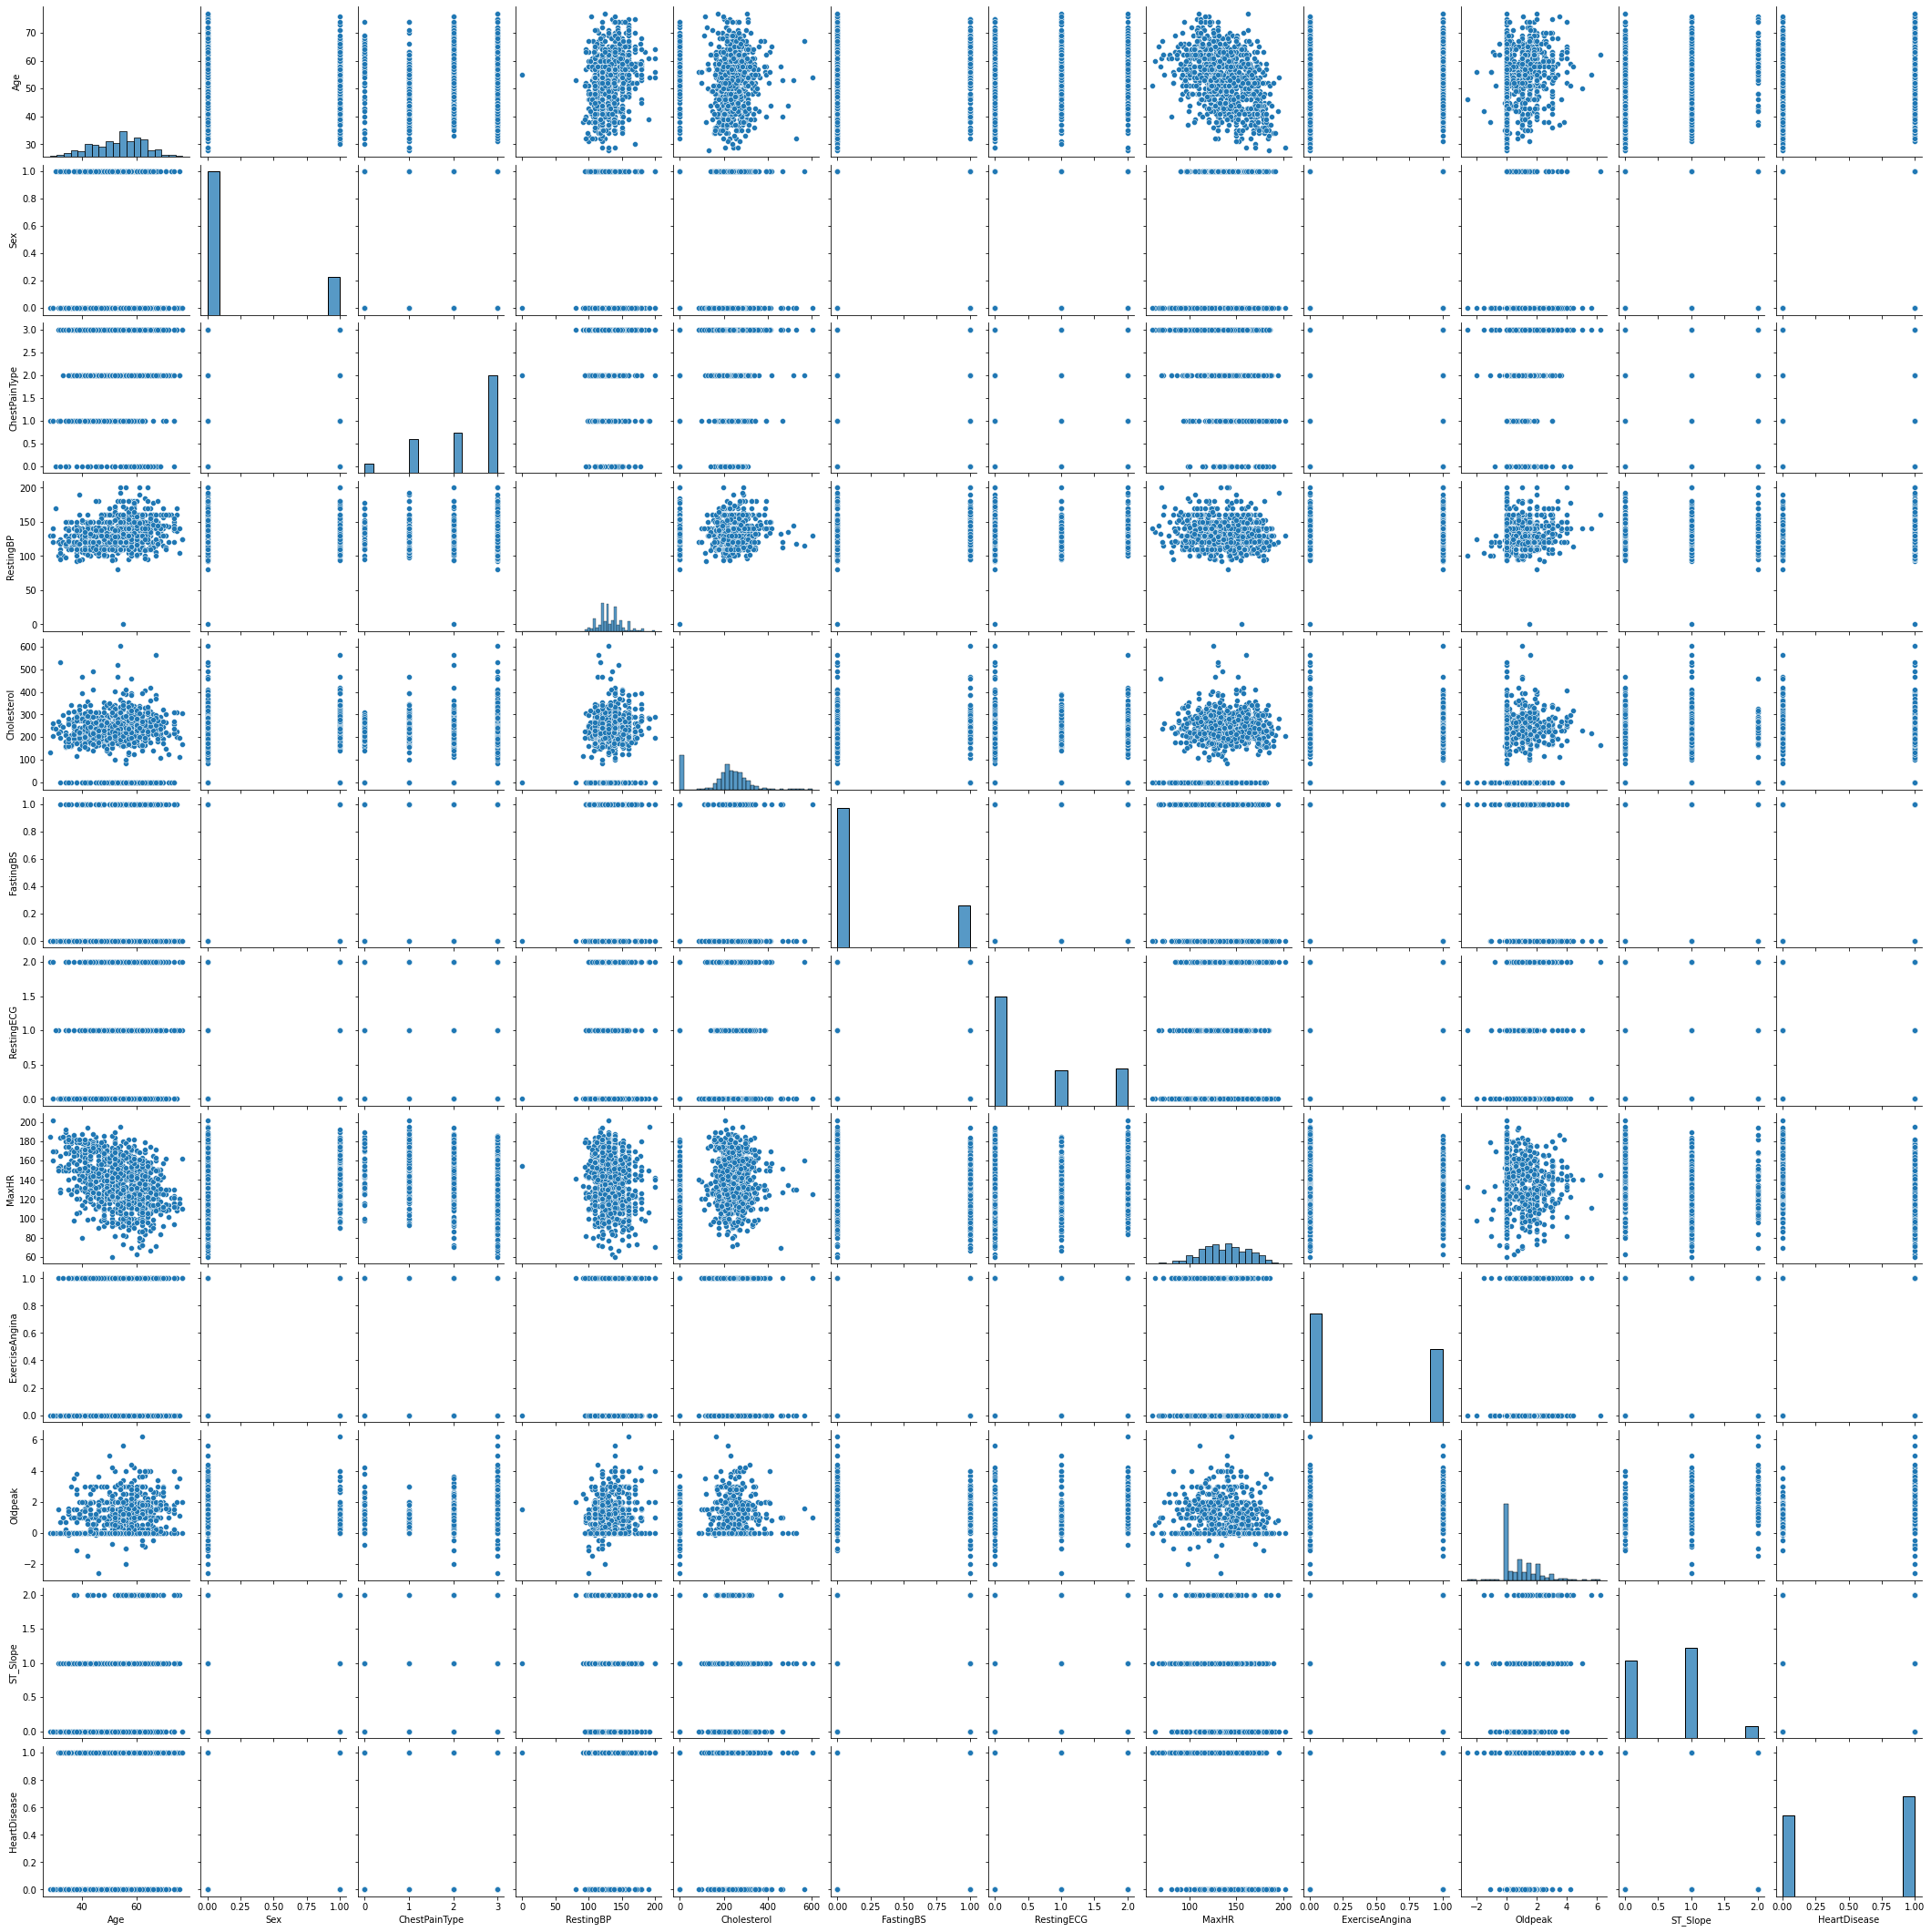

In [6]:
#PairPlot
sns.pairplot(data=df)
plt.show()

In [7]:
print(df.corr())

                     Age       Sex  ChestPainType  RestingBP  Cholesterol  \
Age             1.000000 -0.055750       0.165896   0.254399    -0.095282   
Sex            -0.055750  1.000000      -0.168254  -0.005133     0.200092   
ChestPainType   0.165896 -0.168254       1.000000   0.022168    -0.136139   
RestingBP       0.254399 -0.005133       0.022168   1.000000     0.100893   
Cholesterol    -0.095282  0.200092      -0.136139   0.100893     1.000000   
FastingBS       0.198039 -0.120076       0.116703   0.070193    -0.260974   
RestingECG      0.213152  0.018343       0.031383   0.097661     0.112095   
MaxHR          -0.382045  0.189186      -0.343654  -0.112135     0.235792   
ExerciseAngina  0.215793 -0.190664       0.416625   0.155101    -0.034166   
Oldpeak         0.258612 -0.105734       0.245027   0.164803     0.050148   
ST_Slope        0.268264 -0.150693       0.317480   0.075162    -0.111471   
HeartDisease    0.282039 -0.305445       0.471354   0.107589    -0.232741   

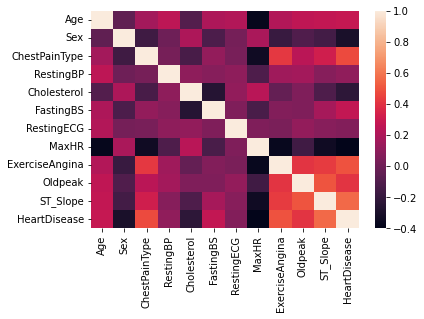

In [8]:
#HeatMap
sns.heatmap(df.corr())
plt.show()

In [12]:
X=df[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina','Oldpeak', 'ST_Slope']]
y=df[[ 'HeartDisease']]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [14]:
lm=LinearRegression()

In [15]:
print(lm.fit(X_train, y_train))

LinearRegression()


In [16]:
print(lm.intercept_)

[0.26295863]


In [17]:
n=lm.coef_

In [18]:
n.shape

(1, 11)

In [19]:
n = n.reshape(11,1)

print(X_train.columns)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')


In [20]:
cdf= pd.DataFrame (n, X. columns, columns=['coeff'])

In [21]:
print(cdf)

                   coeff
Age             0.000655
Sex            -0.161669
ChestPainType   0.085248
RestingBP       0.000518
Cholesterol    -0.000498
FastingBS       0.111106
RestingECG      0.005031
MaxHR          -0.001475
ExerciseAngina  0.178671
Oldpeak         0.051060
ST_Slope        0.287036


In [22]:
prediction=lm.predict(X_test)

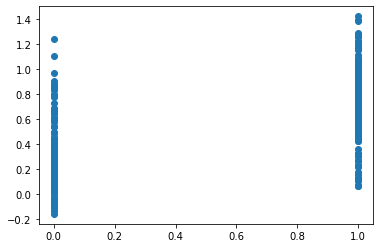

In [23]:
plt.scatter(y_test,prediction)
plt.show()